# **EDA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nyc_df = pd.read_csv("/content/AB_NYC_2019.csv")

In [5]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Cleaning

In [7]:
nyc_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Handling missing values
# For 'name' and 'host_name', we'll replace missing values with 'Unknown'
nyc_df['name'].fillna('Unknown', inplace=True)
nyc_df['host_name'].fillna('Unknown', inplace=True)

# For 'last_review' and 'reviews_per_month', missing values suggest no reviews.
# We'll fill missing 'last_review' with an indicative string, and 'reviews_per_month' with 0
nyc_df['last_review'].fillna('No Reviews', inplace=True)
nyc_df['reviews_per_month'].fillna(0, inplace=True)

In [9]:
# Checking and removing duplicates, if any
initial_count = len(nyc_df)
nyc_df.drop_duplicates(inplace=True)
duplicates_removed = initial_count - len(nyc_df)
duplicates_removed

0

In [10]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
nyc_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Descriptive Statistics

In [12]:
nyc_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**The descriptive statistics reveal several interesting aspects of the dataset:**

**Price:** The average price per night is approximately 153 dollars, with a wide range from 0 to 10,000 dollars, indicating potential outliers or luxury listings. The standard deviation is quite high at $240, suggesting significant variability in pricing.

**Minimum Nights:** On average, listings require a 7-night stay, but this varies widely up to 1,250 nights, hinting at potential data entry errors or extremely long-term listings.

**Number of Reviews:** Listings have an average of about 23 reviews, with a maximum of 629 reviews. This indicates varying levels of engagement and popularity among listings.

**Reviews per Month:** The mean reviews per month is around 1.09, with a maximum of 58.5, showing some listings are much more frequently reviewed than others.

**Availability:** On average, listings are available 113 days per year, but availability ranges from 0 to 365 days, reflecting diverse hosting strategies.

# Univariate Analysis

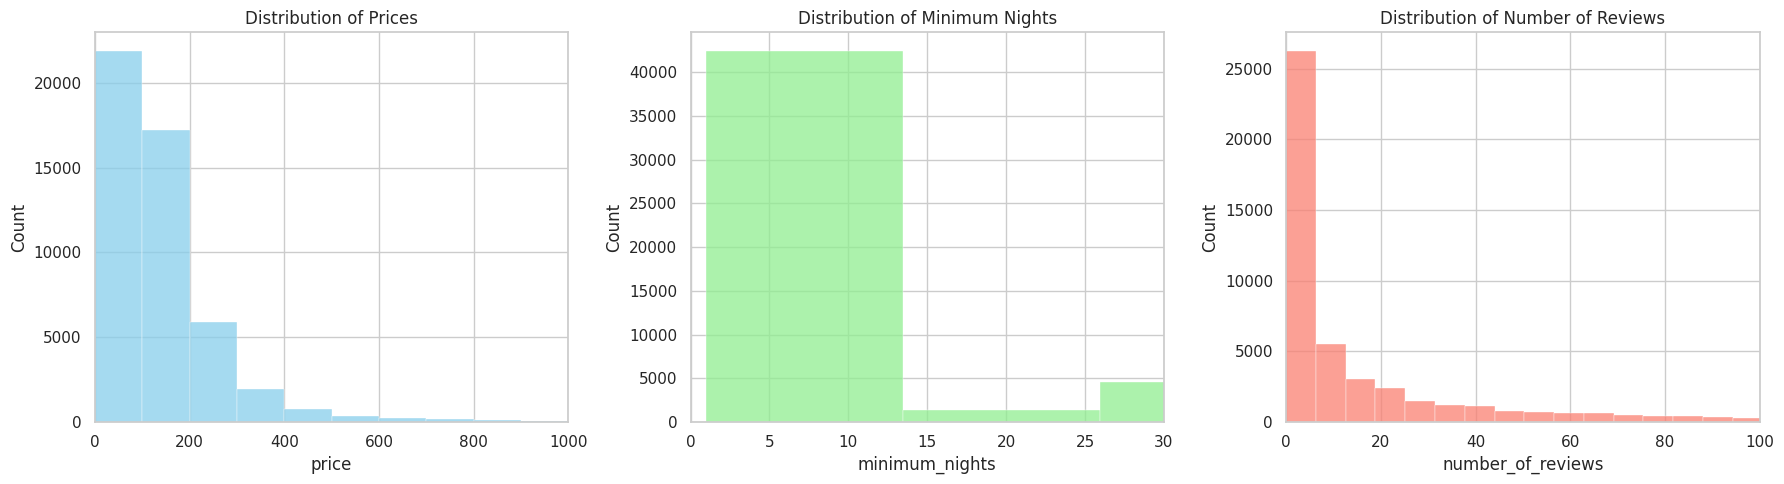

In [13]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots for histograms of price, minimum nights, and number of reviews
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Price distribution
sns.histplot(nyc_df['price'], bins=100, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Prices')
ax[0].set_xlim(0, 1000)  # Limiting to more common price range for better visibility

# Minimum nights distribution
sns.histplot(nyc_df['minimum_nights'], bins=100, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Minimum Nights')
ax[1].set_xlim(0, 30)  # Focusing on the common range for minimum nights

# Number of reviews distribution
sns.histplot(nyc_df['number_of_reviews'], bins=100, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Number of Reviews')
ax[2].set_xlim(0, 100)  # Focusing on a more common range of reviews

plt.tight_layout()
plt.show()

**The histograms provide valuable insights into the distributions of key variables:**

**Prices:** The distribution of listing prices is highly skewed to the right, with the majority of listings priced under $250 per night. There are few listings with very high prices, which may represent luxury accommodations or potential outliers.

**Minimum Nights:** The distribution of minimum nights required is also right-skewed, with most listings requiring fewer than 5 nights stay, indicating a market geared towards short-term rentals. Listings requiring more than 30 nights are less common and might be targeted towards long-term stays or could be outliers.

**Number of Reviews:** The number of reviews per listing is right-skewed, with a significant number of listings having fewer than 20 reviews. This suggests that while some listings are highly popular, many others have limited feedback.

These observations highlight the diversity in the New York City Airbnb market, with a wide range of prices, minimum stay requirements, and varying levels of guest engagement.

# Bivariate and Multivariate Analysis

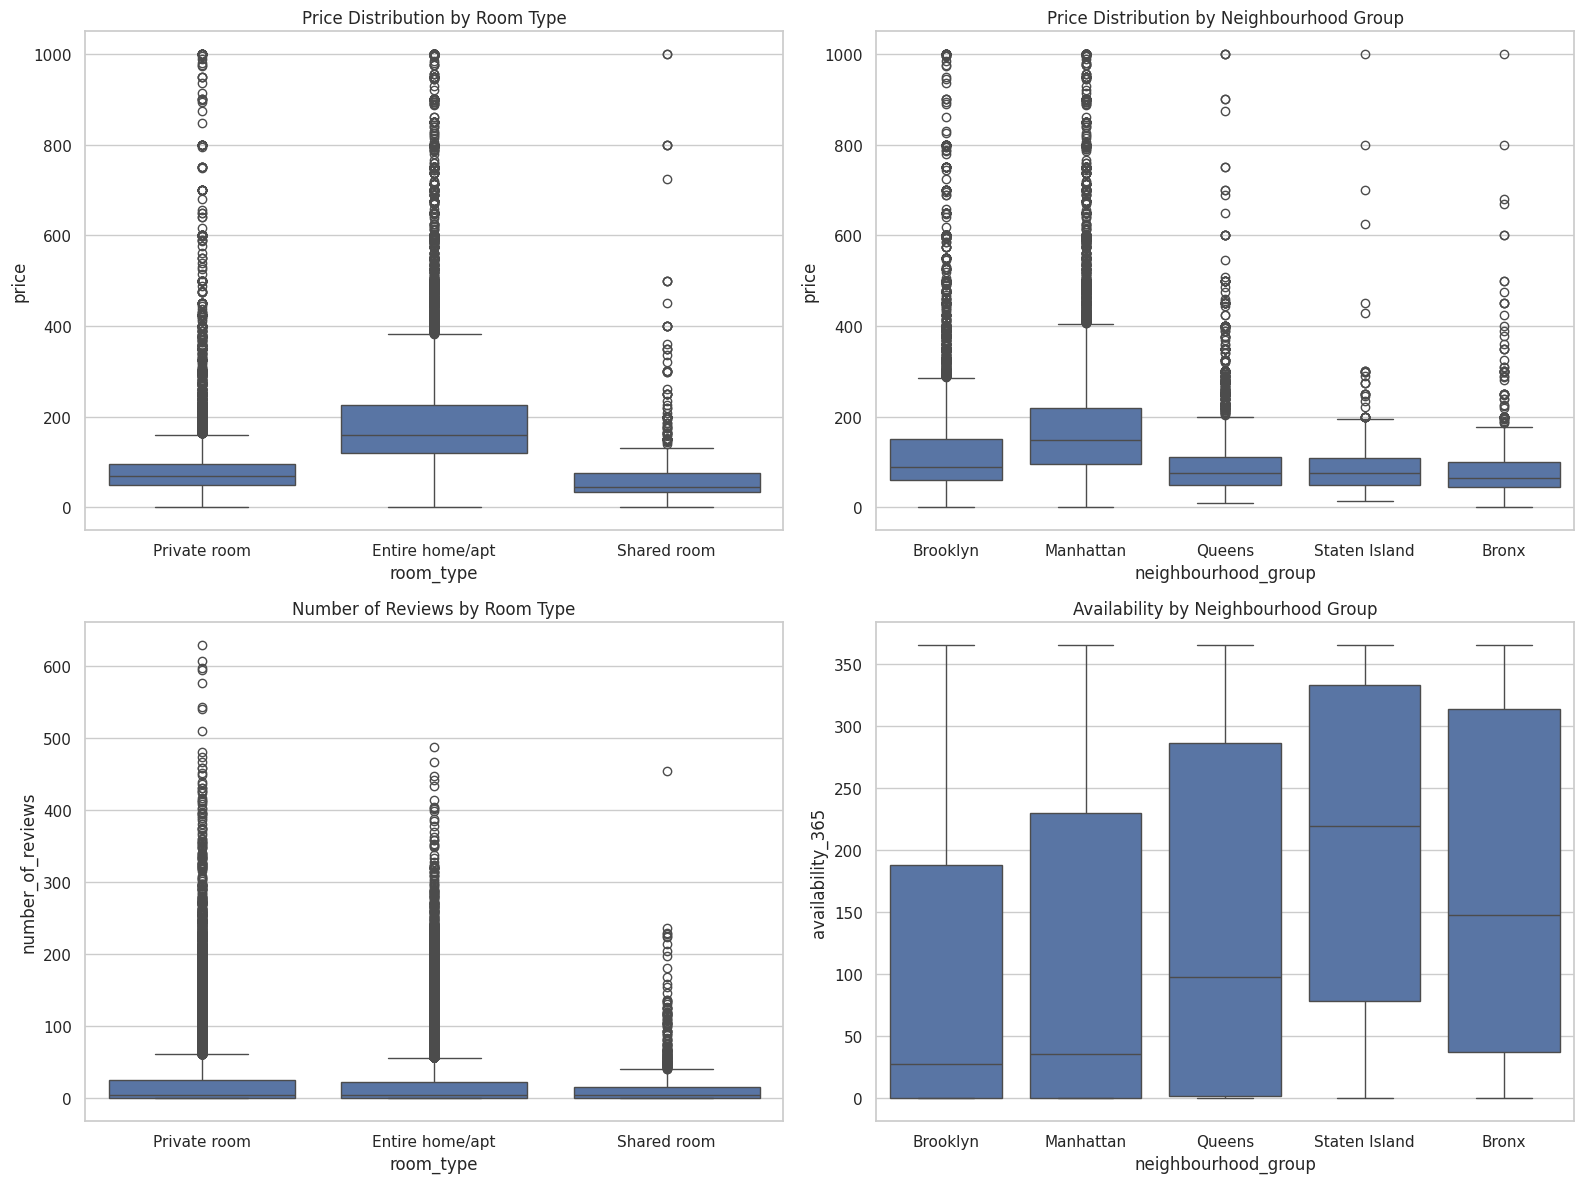

In [14]:
# Setting up the figure for bivariate analyses
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Price vs. Room Type
sns.boxplot(x='room_type', y='price', data=nyc_df[nyc_df['price'] <= 1000], ax=ax[0, 0])  # Limit price for better visualization
ax[0, 0].set_title('Price Distribution by Room Type')

# Price vs. Neighbourhood Group
sns.boxplot(x='neighbourhood_group', y='price', data=nyc_df[nyc_df['price'] <= 1000], ax=ax[0, 1])  # Again, limit price for clarity
ax[0, 1].set_title('Price Distribution by Neighbourhood Group')

# Number of Reviews vs. Room Type
sns.boxplot(x='room_type', y='number_of_reviews', data=nyc_df, ax=ax[1, 0])
ax[1, 0].set_title('Number of Reviews by Room Type')

# Availability vs. Neighbourhood Group
sns.boxplot(x='neighbourhood_group', y='availability_365', data=nyc_df, ax=ax[1, 1])
ax[1, 1].set_title('Availability by Neighbourhood Group')

plt.tight_layout()
plt.show()


**The bivariate analyses yield several interesting findings:**

**Price Distribution by Room Type:** The median price varies significantly by room type, with Entire home/apts being the most expensive, followed by Private rooms and then Shared rooms. The variation within Entire home/apts and Private rooms is substantial, indicating a wide range of options for travelers.

**Price Distribution by Neighbourhood Group:** There are noticeable differences in median prices across neighbourhood groups, with Manhattan being the most expensive, followed by Brooklyn, Queens, Staten Island, and the Bronx. Manhattan and Brooklyn show a wide range of prices, reflecting their popularity and diversity of listings.

**Number of Reviews by Room Type:** Private rooms and Entire home/apts tend to have a higher number of reviews compared to Shared rooms, possibly indicating higher occupancy or guest preference. The distribution of reviews is quite wide for Private and Entire homes, suggesting variability in guest experiences or listing popularity.

**Availability by Neighbourhood Group:** Listings in Staten Island and the Bronx tend to have higher availability throughout the year, whereas Manhattan, Brooklyn, and Queens show lower availability, potentially reflecting higher demand or more active management of listings in these areas.

These insights underscore the complexity of the New York City Airbnb market, with price, demand, and availability influenced by a variety of factors including room type and geographical location.

# Temporal Trends Analysis

Understanding how prices and availability change over time can offer insights into market seasonality, demand fluctuations, and optimal times for hosts to list their properties or for guests to book their stays.

First, we'll examine the distribution of the last_review dates to understand when listings were most recently reviewed, acknowledging that our dataset stops in 2019 and may not reflect current trends.

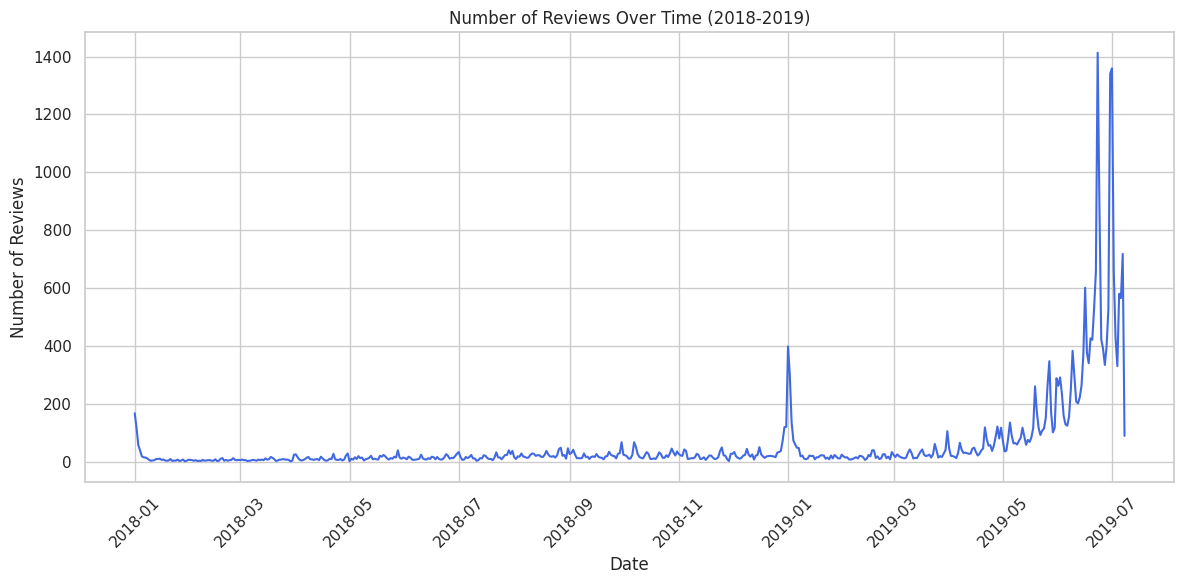

In [15]:
from datetime import datetime

# Convert 'last_review' to datetime, excluding "No Reviews"
nyc_df['last_review_date'] = pd.to_datetime(nyc_df['last_review'], errors='coerce')

# Plotting the distribution of review dates for the year 2018-2019 to see recent activity
plt.figure(figsize=(12, 6))
nyc_df['last_review_date'].dt.date[nyc_df['last_review_date'].dt.year >= 2018].value_counts().sort_index().plot(kind='line', color='royalblue')
plt.title('Number of Reviews Over Time (2018-2019)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusting the layout to make room for the rotated x-axis labels
plt.show()


Peaks in the graph could correspond to popular travel seasons or specific events in New York City that attracted more guests. Notably, there's a general increase in reviews during certain periods, suggesting seasonality in booking patterns.

# Spatial Analysis with Map Visualization

In [16]:
import folium
from folium.plugins import HeatMap

# Creating a map centered around NYC
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Adding a heat map layer to show the density of Airbnb listings
HeatMap(nyc_df[['latitude', 'longitude']], radius=8).add_to(nyc_map)

nyc_map.save('/content/nyc_airbnb_listings_map.html')
nyc_map

# Correlation Analysis

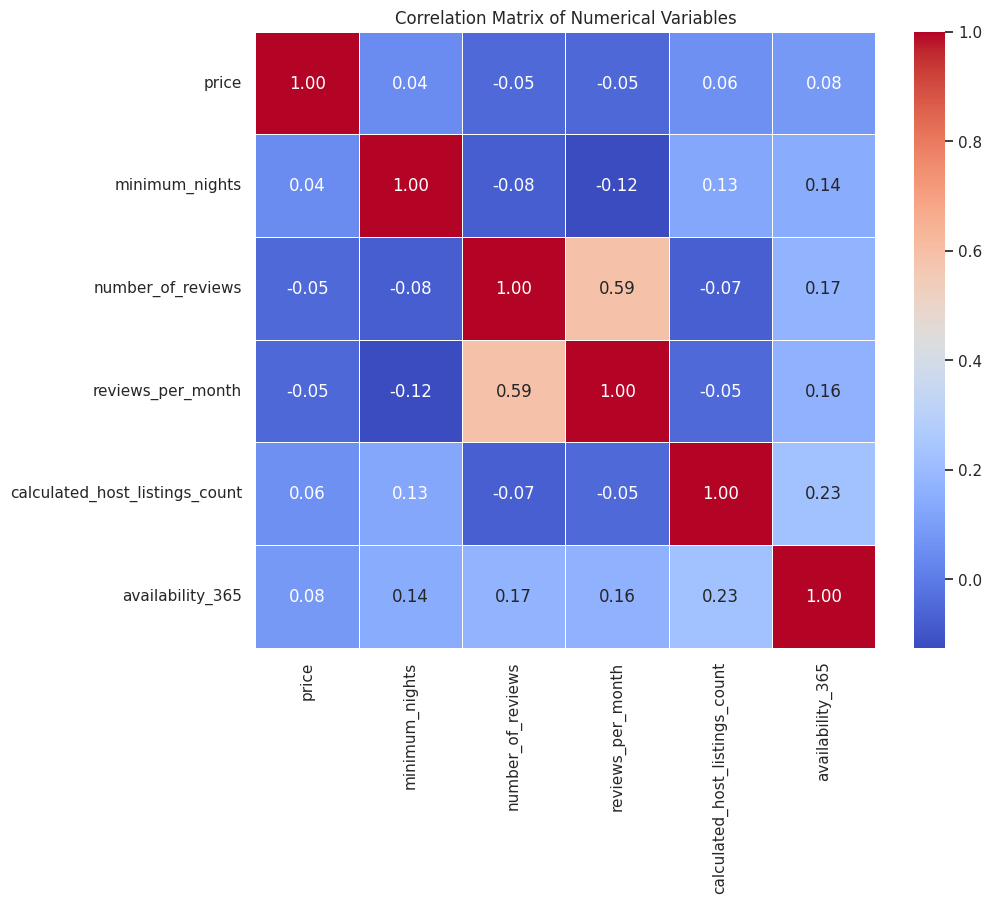

In [17]:
# Correlation Analysis
correlation_matrix = nyc_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                           'calculated_host_listings_count', 'availability_365']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**The correlation matrix provides insights into how numerical variables within the dataset are related to each other:**

**Price:** There's a very low correlation between price and other variables, indicating that factors like minimum nights, number of reviews, reviews per month, host listings count, and availability don't strongly predict the price directly. This suggests that price is influenced by other factors not captured by these variables, such as location specifics, listing quality, or amenities.

**Number of Reviews and Reviews per Month:** There's a moderate positive correlation between the number of reviews and reviews per month (0.59), which makes sense as more popular listings (with more reviews) likely receive reviews more frequently.

**Calculated Host Listings Count and Availability:** A slight positive correlation (0.23) suggests that hosts with more listings might have slightly higher availability across their listings, possibly indicating professional hosting operations.

# Room Type and Location Impact

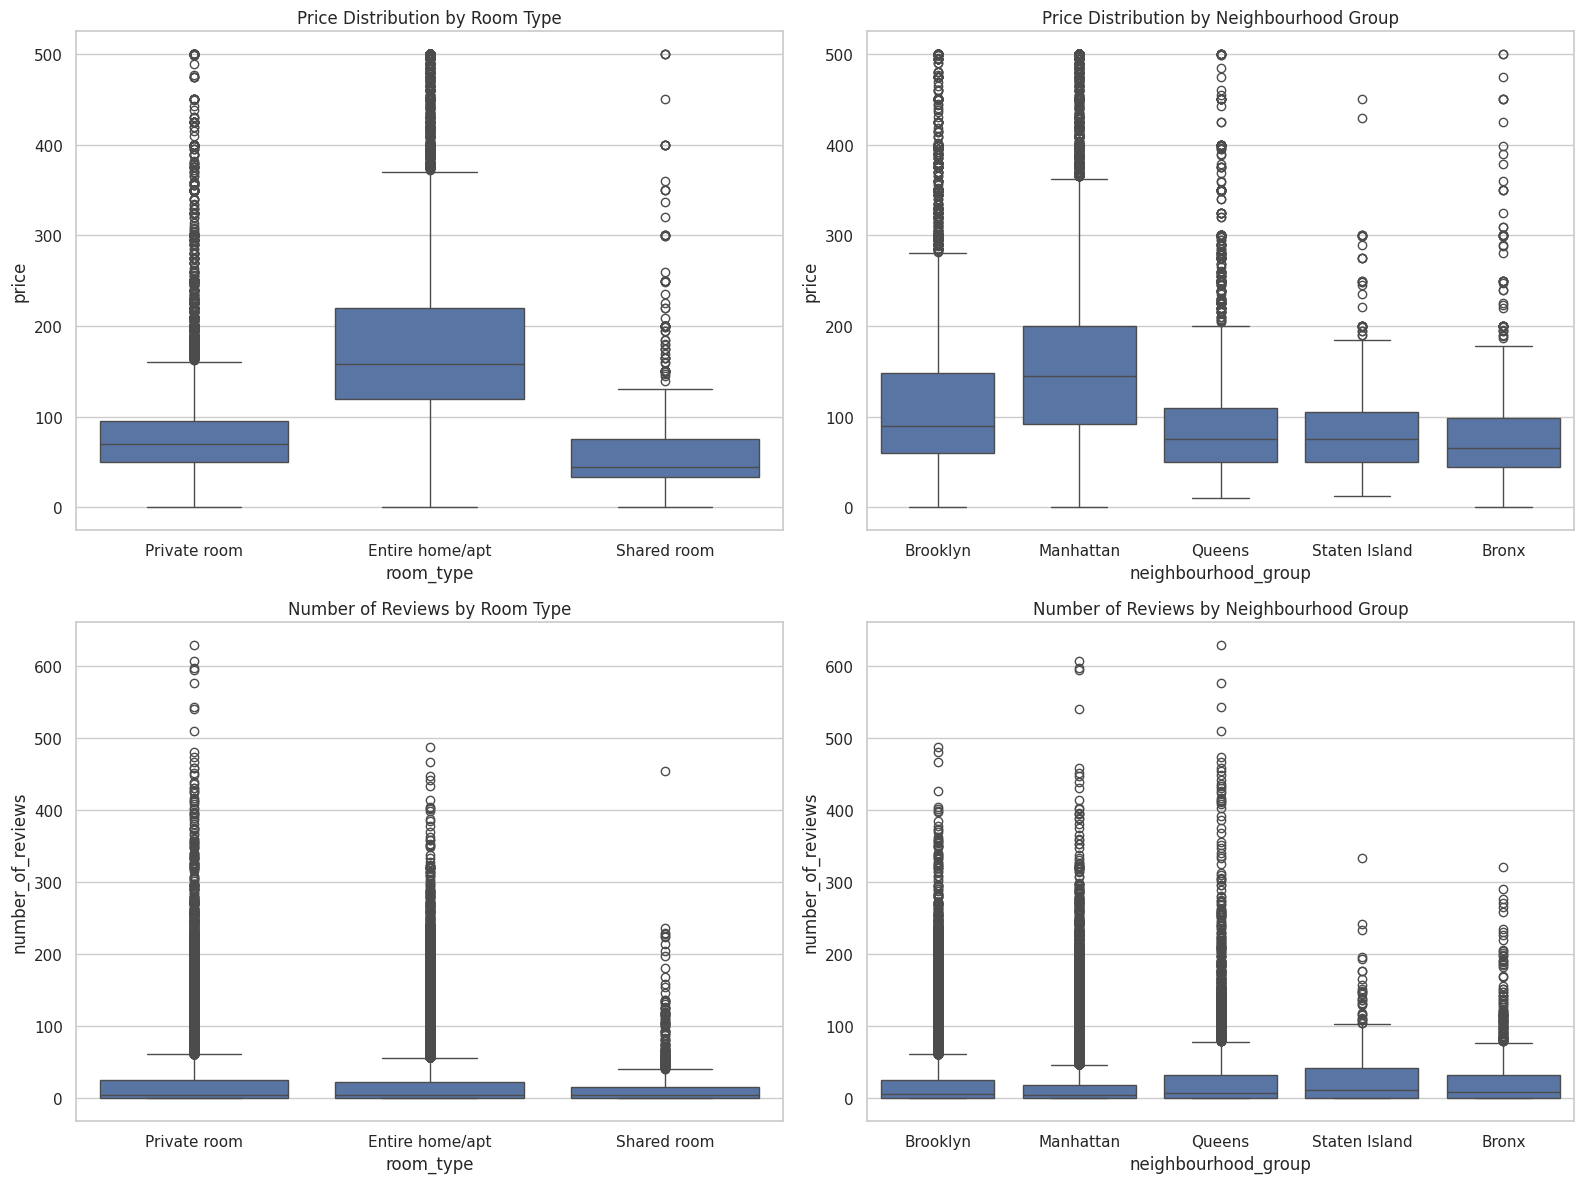

In [18]:
# Setting up the figure for analysis of room type and location impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price by Room Type
sns.boxplot(ax=axes[0, 0], x='room_type', y='price', data=nyc_df[nyc_df['price'] <= 500])
axes[0, 0].set_title('Price Distribution by Room Type')

# Price by Neighbourhood Group
sns.boxplot(ax=axes[0, 1], x='neighbourhood_group', y='price', data=nyc_df[nyc_df['price'] <= 500])
axes[0, 1].set_title('Price Distribution by Neighbourhood Group')

# Number of Reviews by Room Type
sns.boxplot(ax=axes[1, 0], x='room_type', y='number_of_reviews', data=nyc_df)
axes[1, 0].set_title('Number of Reviews by Room Type')

# Number of Reviews by Neighbourhood Group
sns.boxplot(ax=axes[1, 1], x='neighbourhood_group', y='number_of_reviews', data=nyc_df)
axes[1, 1].set_title('Number of Reviews by Neighbourhood Group')

plt.tight_layout()
plt.show()


**The analysis of room type and location (neighbourhood group) reveals significant insights into their impact on price and popularity:**

**Price Distribution by Room Type:** The price varies significantly with room type. Entire homes/apartments tend to have the highest median prices, followed by private rooms and then shared rooms. The variability in prices is also much higher for entire homes/apartments, indicating a broad range of offerings, from budget to luxury.

**Price Distribution by Neighbourhood Group:** Manhattan stands out as having the highest median prices, consistent with its status as a highly sought-after location. Brooklyn and Queens follow, with Staten Island and the Bronx being the most affordable. This reflects the general market perception of these areas and their demand among tourists and visitors.

**Number of Reviews by Room Type:** Private rooms and entire homes/apartments generally have more reviews than shared rooms, suggesting they are more popular or frequently booked options. This could be due to a preference for privacy or the nature of trips (tourism, business, etc.) that NYC attracts.

**Number of Reviews by Neighbourhood Group:** The distribution of reviews across neighbourhood groups does not show as stark a contrast as price does, suggesting that while guests are willing to pay more to stay in certain areas, they are generally satisfied with their experiences across the city. Brooklyn and Manhattan, being popular tourist destinations, have a wide range of reviews, reflecting their higher traffic.

# Host Impact

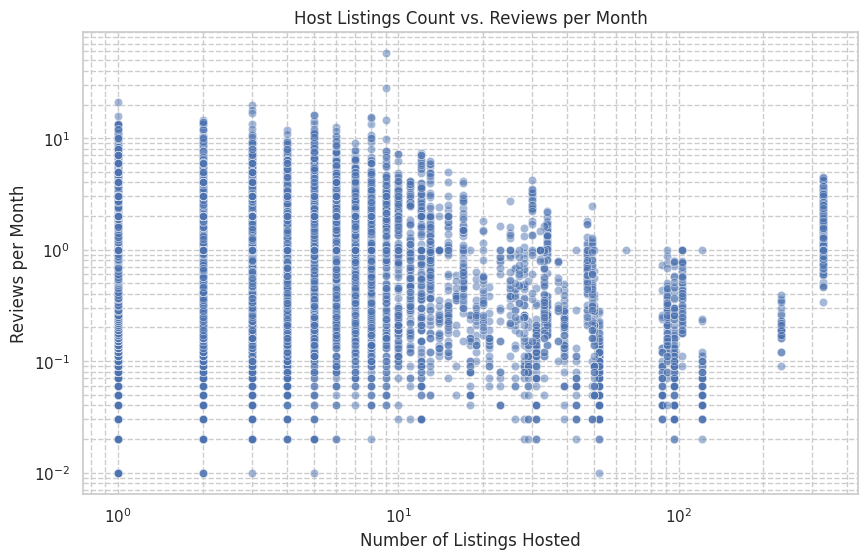

In [19]:
# Scatter plot of calculated_host_listings_count vs reviews_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculated_host_listings_count', y='reviews_per_month', data=nyc_df, alpha=0.5)
plt.title('Host Listings Count vs. Reviews per Month')
plt.xlabel('Number of Listings Hosted')
plt.ylabel('Reviews per Month')
plt.xscale('log')  # Using a logarithmic scale due to wide range of values
plt.yscale('log')  # Log scale for better visibility of distribution
plt.grid(True, which="both", ls="--")
plt.show()


**The scatter plot comparing the number of listings a host manages against the reviews per month, both on logarithmic scales for better visibility, reveals some interesting patterns:**

**Variability in Reviews per Month:** There's a wide range of reviews per month across listings, regardless of how many properties a host manages. This suggests that the popularity of listings (as indicated by review frequency) is not strictly dependent on the number of listings a host has.

**Trend Observation:** While there are hosts with many listings and varying levels of review activity, there doesn't appear to be a clear linear relationship between the number of listings managed and the average number of reviews per month. Some hosts with a high number of listings have listings with lower average reviews per month, possibly indicating that managing more listings could dilute the attention each listing receives, affecting its overall review frequency.

**Diverse Host Strategies:** The data points are spread across the plot, highlighting the diversity in hosting strategies and outcomes. Some hosts manage to maintain high levels of reviews per month across multiple listings, while others with fewer listings have both high and low review frequencies.

# EDA Summary and Insights

**Through our in-depth EDA, we've uncovered a variety of insights into the NYC Airbnb market:**

**Pricing Dynamics:** Room type and location are significant determinants of pricing, with entire homes/apartments and listings in Manhattan commanding higher prices.

**Popularity Indicators:** The number of reviews, which can serve as a proxy for listing popularity or booking frequency, shows variability across room types and neighbourhoods, indicating a healthy demand across the board.

**Host Influence:** The analysis suggests that the relationship between the number of listings a host manages and the popularity of those listings is complex, with no straightforward correlation. Quality, listing presentation, and guest experience may play more critical roles in driving reviews than the sheer number of listings managed.

These insights can inform both hosts and guests in making decisions within the Airbnb platform. For hosts, focusing on quality listings and guest experience, regardless of the number of properties managed, seems essential. For guests, these findings highlight the importance of considering room type and location in their booking decisions, balancing cost with their preferences and needs.